# 128 Lightcone 512 Mpc MMM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import time

import py21cmfast as p21c
# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting
# For interacting with the cache
from py21cmfast import cache_tools

## Basic config

In [3]:
output_dir = '/mnt/ddnfs/data_users/cxshan/21-output'
# set the cache dir and write to the config file
p21c.config['direc'] = '/home/cxshan/21cmFAST-cache'
p21c.config.write('/home/cxshan/.21cmfast/config.yml')

## Initial conditions

In [4]:
HII_DIM = 128
BOX_LEN = 530
N_THREADS = 24

In [5]:
# User parameters 
user_m = {"HII_DIM":HII_DIM, 
              "BOX_LEN": BOX_LEN, 
              "N_THREADS": N_THREADS}

# Flag options from M
flag_m = {"INHOMO_RECO":True,
          "USE_TS_FLUCT":True}

astro_m = {"HII_EFF_FACTOR":20,"ION_Tvir_MIN":4.1}

In [6]:
astro_params = astro_m
flag_options = flag_m
user_params = user_m

In [7]:
random_seed = 123456

## Running Lightcones

In [8]:
t0 = time.time()
'{}'.format(time.ctime())

'Sun Feb  6 11:37:53 2022'

In [9]:
lightcone = p21c.run_lightcone(
    redshift = 6.0,
    user_params = user_params,
    flag_options = flag_options,
    astro_params = astro_params,
    lightcone_quantities=("brightness_temp", 'density', 'xH_box'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

/home/cxshan/data/local/usr/anaconda3/envs/21cmsimp38/lib/python3.8/site-packages/py21cmfast/inputs.py:485: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/home/cxshan/data/local/usr/anaconda3/envs/21cmsimp38/lib/python3.8/site-packages/py21cmfast/_utils.py:801: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/cxshan/data/local/usr/anaconda3/envs/21cmsimp38/lib/python3.8/site-packages/py21cmfast/_utils.py:801: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/cxshan/data/local/usr/anaconda3/envs/21cmsimp38/lib/python3.

In [10]:
'{}'.format(time.ctime())

'Sun Feb  6 11:58:13 2022'

In [11]:
t1 = time.time()
print( "time: %.2f s"%( t1-t0) )

time: 1219.89 s


/home/cxshan/data/local/usr/anaconda3/envs/21cmsimp38/lib/python3.8/site-packages/py21cmfast/plotting.py:101: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(slc, origin="lower", cmap=cmap, norm=norm, **imshow_kw)


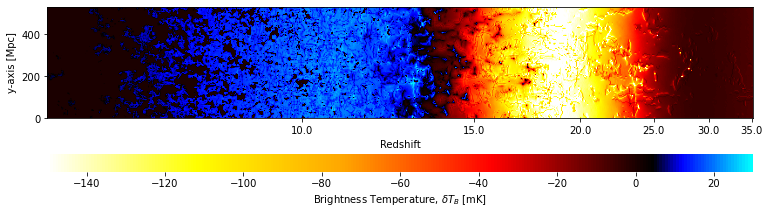

In [12]:
p21c.plotting.lightcone_sliceplot(lightcone);

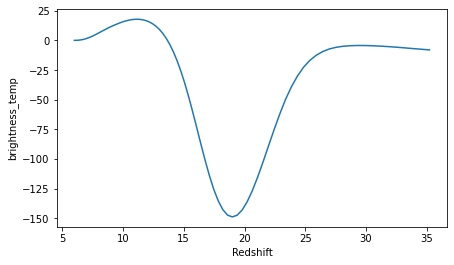

In [13]:
p21c.plotting.plot_global_history(lightcone);

(<Figure size 504x288 with 1 Axes>,
 <AxesSubplot:xlabel='Redshift', ylabel='xH'>)

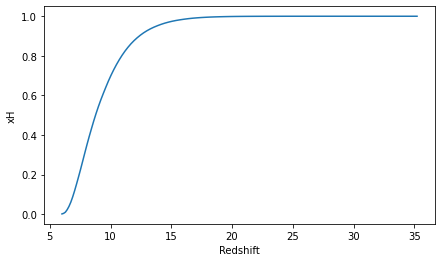

In [14]:
p21c.plotting.plot_global_history(lightcone, kind="xH")